### import modules<a href="#import-modules" class="anchor-link">¶</a>

In \[101\]:

    import numpy as np
    import pandas as pd
    import seaborn as sns
    from sklearn.datasets import load_iris
    from matplotlib import pyplot as plt
    %matplotlib inline
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression 
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier

### load the data set<a href="#load-the-data-set" class="anchor-link">¶</a>

In \[18\]:

    x=load_iris()

In \[20\]:

    df = pd.DataFrame(x.data, columns = x.feature_names)
    df['Target']=x.target
    df.head()

Out\[20\]:

|     | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Target |
|-----|-------------------|------------------|-------------------|------------------|--------|
| 0   | 5.1               | 3.5              | 1.4               | 0.2              | 0      |
| 1   | 4.9               | 3.0              | 1.4               | 0.2              | 0      |
| 2   | 4.7               | 3.2              | 1.3               | 0.2              | 0      |
| 3   | 4.6               | 3.1              | 1.5               | 0.2              | 0      |
| 4   | 5.0               | 3.6              | 1.4               | 0.2              | 0      |

In \[21\]:

    # display stats about the data

In \[22\]:

    df.describe()

Out\[22\]:

|       | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Target     |
|-------|-------------------|------------------|-------------------|------------------|------------|
| count | 150.000000        | 150.000000       | 150.000000        | 150.000000       | 150.000000 |
| mean  | 5.843333          | 3.057333         | 3.758000          | 1.199333         | 1.000000   |
| std   | 0.828066          | 0.435866         | 1.765298          | 0.762238         | 0.819232   |
| min   | 4.300000          | 2.000000         | 1.000000          | 0.100000         | 0.000000   |
| 25%   | 5.100000          | 2.800000         | 1.600000          | 0.300000         | 0.000000   |
| 50%   | 5.800000          | 3.000000         | 4.350000          | 1.300000         | 1.000000   |
| 75%   | 6.400000          | 3.300000         | 5.100000          | 1.800000         | 2.000000   |
| max   | 7.900000          | 4.400000         | 6.900000          | 2.500000         | 2.000000   |

In \[23\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 150 entries, 0 to 149
    Data columns (total 5 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   sepal length (cm)  150 non-null    float64
     1   sepal width (cm)   150 non-null    float64
     2   petal length (cm)  150 non-null    float64
     3   petal width (cm)   150 non-null    float64
     4   Target             150 non-null    int32  
    dtypes: float64(4), int32(1)
    memory usage: 5.4 KB

In \[24\]:

    df.shape

Out\[24\]:

    (150, 5)

In \[30\]:

    # null value checking 
    df.isnull().sum()

Out\[30\]:

    sepal length (cm)    0
    sepal width (cm)     0
    petal length (cm)    0
    petal width (cm)     0
    Target               0
    dtype: int64

In \[31\]:

    # number of sample in each class

In \[32\]:

    df['Target'].value_counts()

Out\[32\]:

    Target
    0    50
    1    50
    2    50
    Name: count, dtype: int64

In \[44\]:

    def name(x):
        if x['Target'] == 0:
            return 'setosa'
        elif x['Target'] == 1:
            return 'versicolor'
        else:
            return 'virginica'

    df['target_names'] = df.apply(name, axis=1)

In \[45\]:

    df

Out\[45\]:

|     | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Target | target_names |
|-----|-------------------|------------------|-------------------|------------------|--------|--------------|
| 0   | 5.1               | 3.5              | 1.4               | 0.2              | 0      | setosa       |
| 1   | 4.9               | 3.0              | 1.4               | 0.2              | 0      | setosa       |
| 2   | 4.7               | 3.2              | 1.3               | 0.2              | 0      | setosa       |
| 3   | 4.6               | 3.1              | 1.5               | 0.2              | 0      | setosa       |
| 4   | 5.0               | 3.6              | 1.4               | 0.2              | 0      | setosa       |
| ... | ...               | ...              | ...               | ...              | ...    | ...          |
| 145 | 6.7               | 3.0              | 5.2               | 2.3              | 2      | virginica    |
| 146 | 6.3               | 2.5              | 5.0               | 1.9              | 2      | virginica    |
| 147 | 6.5               | 3.0              | 5.2               | 2.0              | 2      | virginica    |
| 148 | 6.2               | 3.4              | 5.4               | 2.3              | 2      | virginica    |
| 149 | 5.9               | 3.0              | 5.1               | 1.8              | 2      | virginica    |

150 rows × 6 columns

In \[46\]:

    df['target_names'].value_counts()

Out\[46\]:

    target_names
    setosa        50
    versicolor    50
    virginica     50
    Name: count, dtype: int64

In \[47\]:

    df.rename(columns={'target_names': 'species'}, inplace=True)
    df.head()

Out\[47\]:

|     | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Target | species |
|-----|-------------------|------------------|-------------------|------------------|--------|---------|
| 0   | 5.1               | 3.5              | 1.4               | 0.2              | 0      | setosa  |
| 1   | 4.9               | 3.0              | 1.4               | 0.2              | 0      | setosa  |
| 2   | 4.7               | 3.2              | 1.3               | 0.2              | 0      | setosa  |
| 3   | 4.6               | 3.1              | 1.5               | 0.2              | 0      | setosa  |
| 4   | 5.0               | 3.6              | 1.4               | 0.2              | 0      | setosa  |

#### explore the data<a href="#explore-the-data" class="anchor-link">¶</a>

### scatterplot<a href="#scatterplot" class="anchor-link">¶</a>

In \[50\]:

    colors=['red','orange','blue']
    species=['setosa' , 'versicolor','virginica']

In \[52\]:

    for i in range(3):
        x = df[df['species'] == species[i]]
        plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c=colors[i], label=species[i])
    plt.xlabel=('Sepal length')
    plt.ylabel('Sepel width')
    plt.legend()

Out\[52\]:

    <matplotlib.legend.Legend at 0x1a320f8bd10>

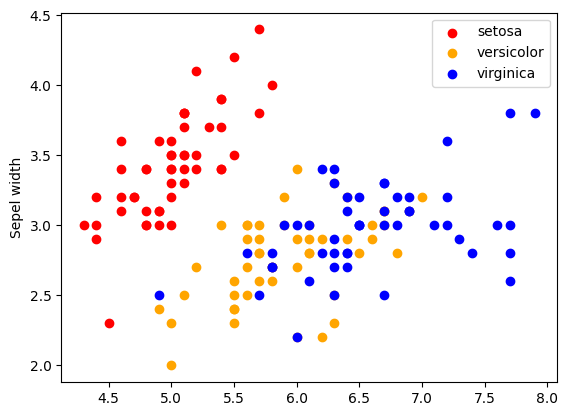

In \[53\]:

    for i in range(3):
        x = df[df['species'] == species[i]]
        plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c=colors[i], label=species[i])
    plt.xlabel=('Patel length')
    plt.ylabel('Patel width')
    plt.legend()

Out\[53\]:

    <matplotlib.legend.Legend at 0x1a321630210>

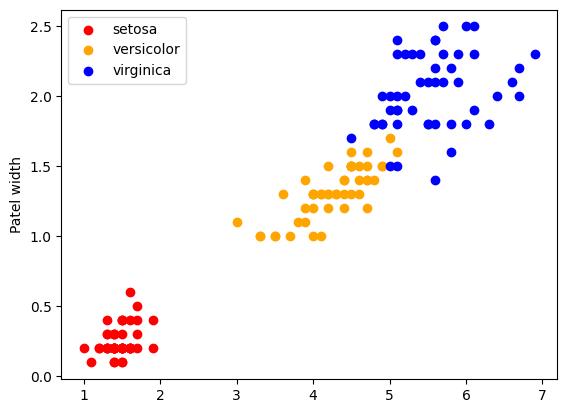

In \[54\]:

    for i in range(3):
        x = df[df['species'] == species[i]]
        plt.scatter(x['petal length (cm)'], x['sepal length (cm)'], c=colors[i], label=species[i])
    plt.xlabel=('Patel length')
    plt.ylabel('sepal length')
    plt.legend()

Out\[54\]:

    <matplotlib.legend.Legend at 0x1a321698210>

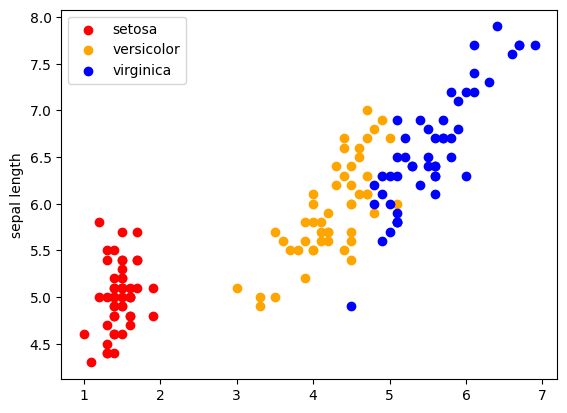

In \[55\]:

    for i in range(3):
        x = df[df['species'] == species[i]]
        plt.scatter(x['petal width (cm)'], x['sepal width (cm)'], c=colors[i], label=species[i])
    plt.xlabel=('Patel width')
    plt.ylabel('sepal width')
    plt.legend()

Out\[55\]:

    <matplotlib.legend.Legend at 0x1a31e33cd10>

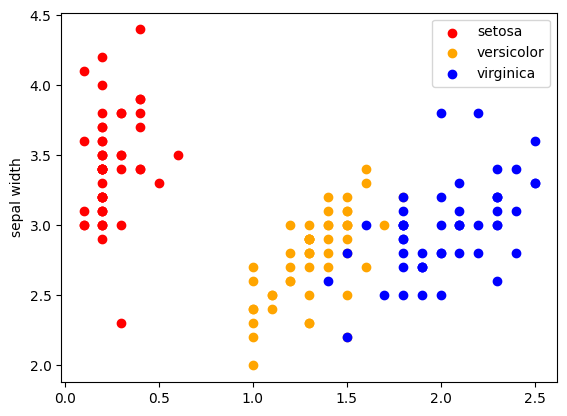

### hist plot<a href="#hist-plot" class="anchor-link">¶</a>

In \[57\]:

    df['sepal length (cm)'].hist()

Out\[57\]:

    <Axes: >

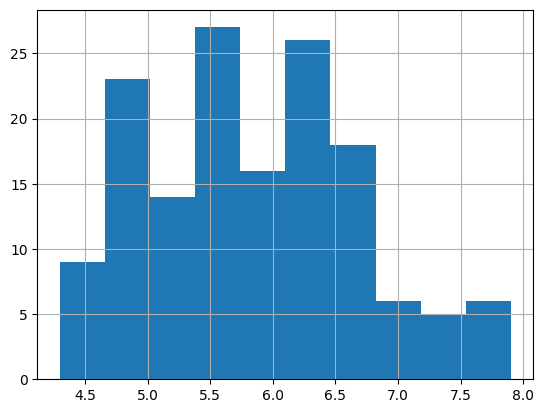

In \[36\]:

    df.['sepal width (cm)'].hist()

Out\[36\]:

    <Axes: >

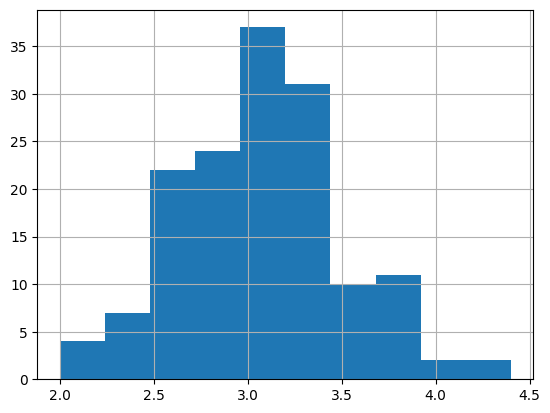

In \[37\]:

    df['petal length (cm)'].hist()

Out\[37\]:

    <Axes: >

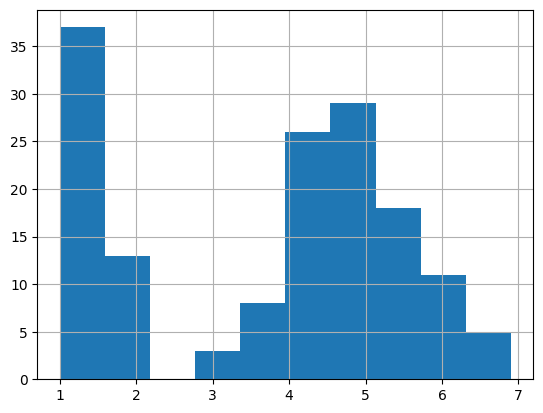

In \[38\]:

    df['petal width (cm)'].hist()

Out\[38\]:

    <Axes: >

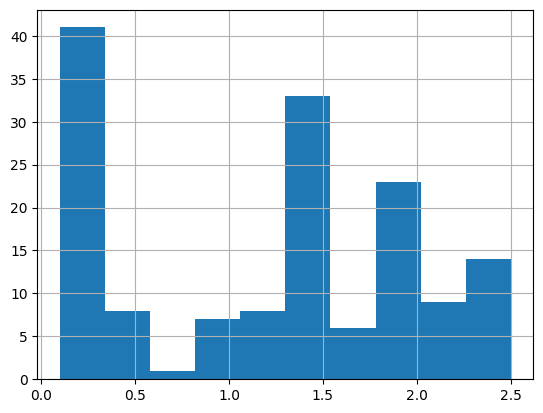

In \[ \]:

     

## coorelation matrix<a href="#coorelation-matrix" class="anchor-link">¶</a>

In \[60\]:

    df1 = df.drop(columns=['species'])

In \[65\]:

    df1.corr()

Out\[65\]:

|                   | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Target    |
|-------------------|-------------------|------------------|-------------------|------------------|-----------|
| sepal length (cm) | 1.000000          | -0.117570        | 0.871754          | 0.817941         | 0.782561  |
| sepal width (cm)  | -0.117570         | 1.000000         | -0.428440         | -0.366126        | -0.426658 |
| petal length (cm) | 0.871754          | -0.428440        | 1.000000          | 0.962865         | 0.949035  |
| petal width (cm)  | 0.817941          | -0.366126        | 0.962865          | 1.000000         | 0.956547  |
| Target            | 0.782561          | -0.426658        | 0.949035          | 0.956547         | 1.000000  |

In \[73\]:

    corr = df1.corr()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, annot=True, ax=ax ,cmap='coolwarm')
    plt.show()

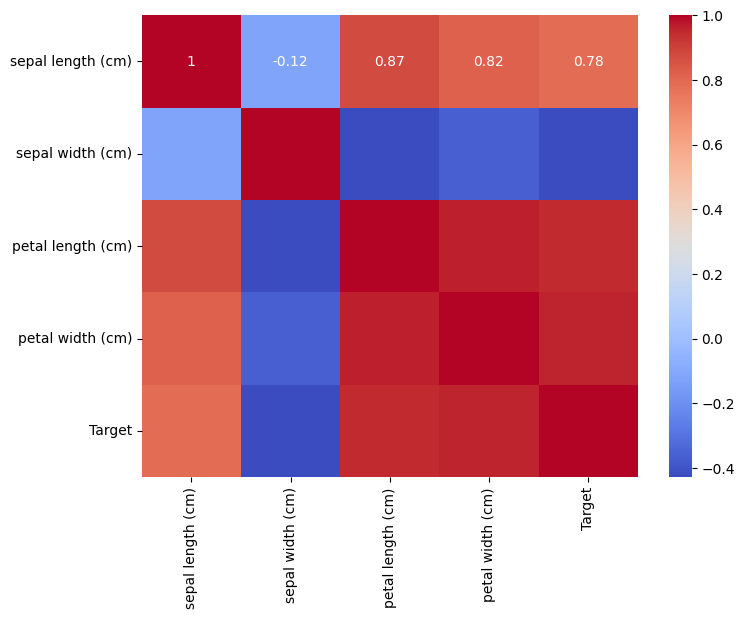

### label encoder<a href="#label-encoder" class="anchor-link">¶</a>

In \[76\]:

    le=LabelEncoder()

In \[77\]:

    df['species']=le.fit_transform(df['species'])
    df.head()

Out\[77\]:

|     | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Target | species |
|-----|-------------------|------------------|-------------------|------------------|--------|---------|
| 0   | 5.1               | 3.5              | 1.4               | 0.2              | 0      | 0       |
| 1   | 4.9               | 3.0              | 1.4               | 0.2              | 0      | 0       |
| 2   | 4.7               | 3.2              | 1.3               | 0.2              | 0      | 0       |
| 3   | 4.6               | 3.1              | 1.5               | 0.2              | 0      | 0       |
| 4   | 5.0               | 3.6              | 1.4               | 0.2              | 0      | 0       |

In \[ \]:

    df = df.drop(columns=['Target'])

In \[83\]:

    df.head()

Out\[83\]:

|     | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species |
|-----|-------------------|------------------|-------------------|------------------|---------|
| 0   | 5.1               | 3.5              | 1.4               | 0.2              | 0       |
| 1   | 4.9               | 3.0              | 1.4               | 0.2              | 0       |
| 2   | 4.7               | 3.2              | 1.3               | 0.2              | 0       |
| 3   | 4.6               | 3.1              | 1.5               | 0.2              | 0       |
| 4   | 5.0               | 3.6              | 1.4               | 0.2              | 0       |

### model Traning<a href="#model-Traning" class="anchor-link">¶</a>

In \[107\]:

    x=df.drop(columns=['species'])
    y=df['species']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In \[108\]:

    # LR 
    model=LogisticRegression()

In \[109\]:

    model.fit(x_train,y_train)

Out\[109\]:

    LogisticRegression()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LogisticRegression

    LogisticRegression()

In \[110\]:

    # performance 
    print('Accuracy:',model.score(x_test,y_test)*100)

    Accuracy: 97.77777777777777

In \[111\]:

    # knn 
    model=KNeighborsClassifier()

In \[112\]:

    model.fit(x_train,y_train)

Out\[112\]:

    KNeighborsClassifier()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

KNeighborsClassifier

    KNeighborsClassifier()

In \[113\]:

    # performance 
    print('Accuracy:',model.score(x_test,y_test)*100)

    Accuracy: 97.77777777777777

In \[114\]:

    # Decision Tree

In \[115\]:

    model=DecisionTreeClassifier()

In \[116\]:

    model.fit(x_train,y_train)

Out\[116\]:

    DecisionTreeClassifier()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

DecisionTreeClassifier

    DecisionTreeClassifier()

In \[117\]:

    # performance 
    print('Accuracy:',model.score(x_test,y_test)*100)

    Accuracy: 95.55555555555556

In \[ \]:

     

In \[ \]: